In [160]:
from scipy.io import loadmat
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm

In [70]:
data = loadmat('2023_CENTURI-SummerSchool/datasets/dataset1_reaching-task/Dataset1.mat')
R = data['R']
directions = data['direction']

R.shape     # n_neurons x n_trials
directions.shape   # n_trials x 1

(158, 1)

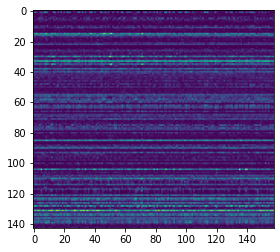

In [47]:
plt.imshow(R)

In [111]:
n1 = R[1,:]
dirs = np.unique(directions)
n1_sep_dirs = []

for dir in dirs:
    n1_curr_dir = n1[np.where(directions == dir)[0]]
    n1_sep_dirs.append(n1_curr_dir)

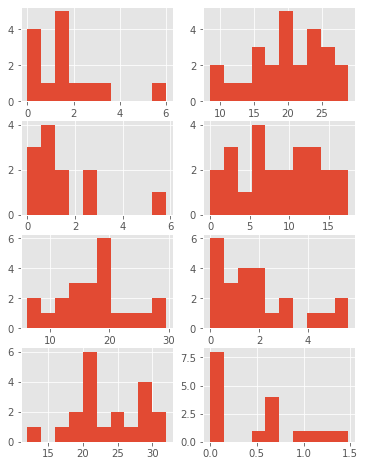

In [146]:
plt.style.use('ggplot')
fig, axs = plt.subplots(4,2, figsize=(6, 8))

for i in range(len(n1_sep_dirs)):
    axs[i%4,i//4].hist(n1_sep_dirs[i])

plt.show()

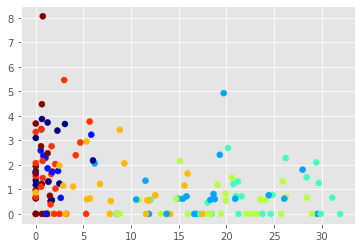

In [178]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]

cmap = LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 20, 21)
norm = BoundaryNorm(bounds, cmap.N)
n2 = R[2,:]
plt.scatter(n1, n2, c=directions, cmap=cmap)
plt.show()


[0.34416885 0.09124433 0.08073195 0.04678118 0.03754192]
[320.09585544 164.81518331 155.03044261 118.01299858 105.71886228]


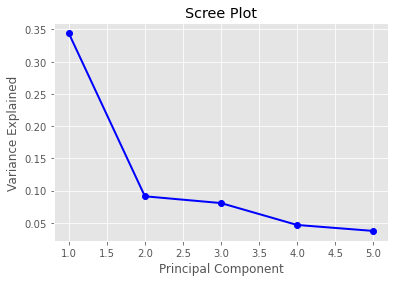

In [192]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(R.T)
PCA(n_components=5)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# bootstrap
# firing rate against direction